In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.cms.style.ROOT)

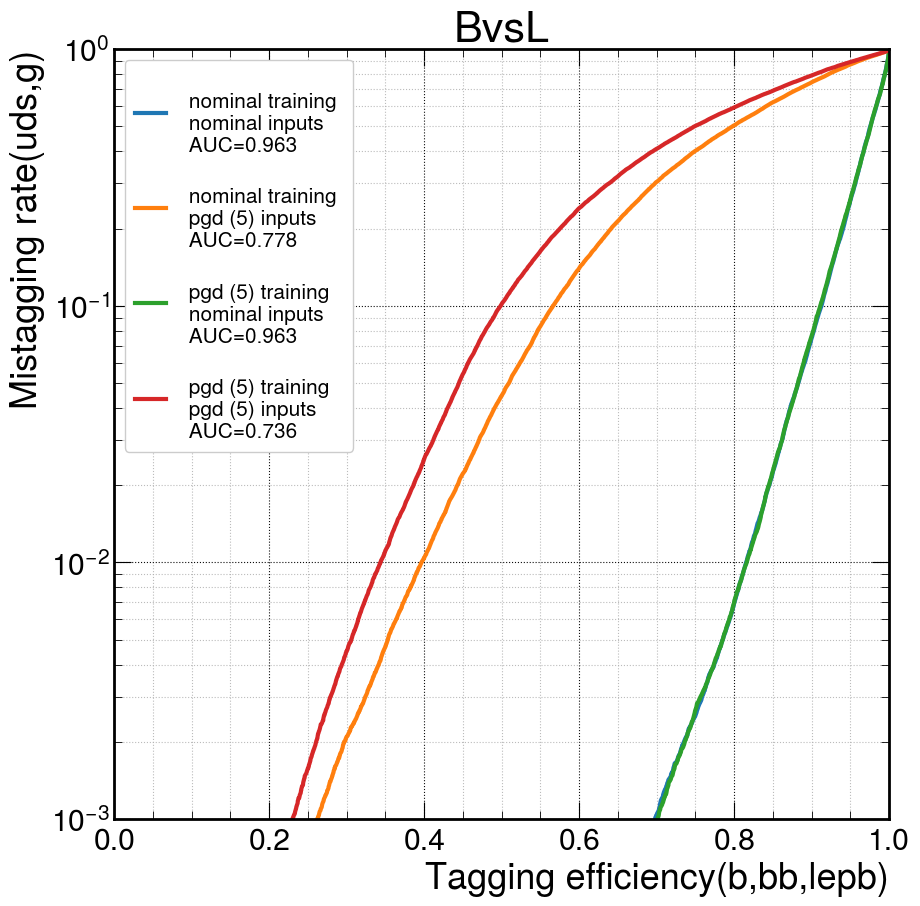

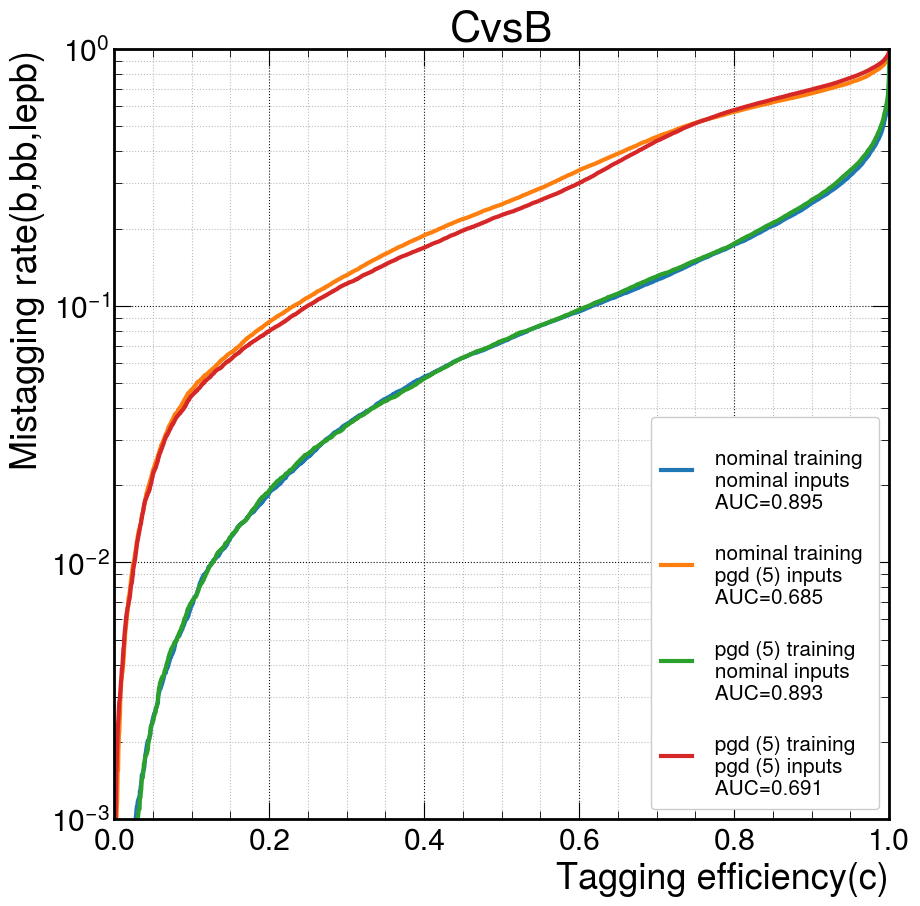

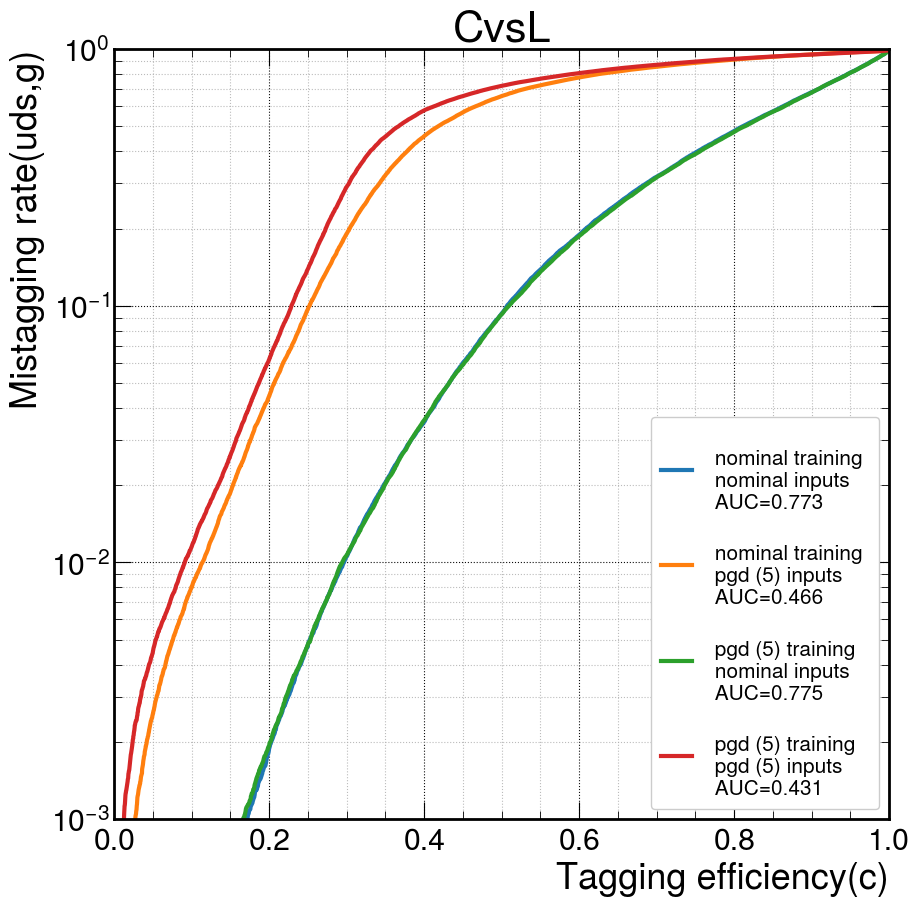

In [2]:
model_paths       = ["nominal/predict/", "nominal/predict_pgd_5/", "pgd_loops/5/predict/", "pgd_loops/5/predict_pgd_5/"]
training_labels   = ["nominal", "nominal", "pgd (5)", "pgd (5)"]
prediction_labels = ["nominal", "pgd (5)", "nominal", "pgd (5)"]

def plot_roc(model_names, labels_train, labels_pred):
    base_input_dir  = "/hpcwork/pj214607/work/promotion/deepjet/results/"
    base_output_dir = "/home/pj214607/work/promotion/deepjet/results/roc_dump/"
    
    tag_names    = ["(b,bb,lepb)", "(c)", "(c)"]
    mistag_names = ["(uds,g)", "(b,bb,lepb)", "(uds,g)"]
    titles       = ["BvsL", "CvsB", "CvsL"]
    
    bvsl = [base_input_dir + f"{model}BvL.npy" for model in model_names]
    cvsb = [base_input_dir + f"{model}CvB.npy" for model in model_names]
    cvsl = [base_input_dir + f"{model}CvL.npy" for model in model_names]

    for i in range(3):
        plt.figure()
        plt.yscale("log")
        plt.xlim(0, 1)
        plt.ylim(1e-3, 1)
        plt.xlabel("Tagging efficiency" + tag_names[i])
        plt.ylabel("Mistagging rate" + mistag_names[i])
        plt.grid(which="minor", alpha=0.85)
        plt.grid(which="major", alpha=0.95, color="black")
        
        if i==0:
            discriminator = bvsl
            title         = titles[0]
        if i==1:
            discriminator = cvsb
            title         = titles[1]
        if i==2:
            discriminator = cvsl
            title         = titles[2]
        for j,d in enumerate(discriminator):
            array = np.load(d)
            plt.plot(array[0], array[1],linewidth=3.0,label=f"\n {labels_train[j]} training \n {labels_pred[j]} inputs \n AUC={np.round(array[2,0], 3)}")
            plt.legend(loc="best", fontsize=15, facecolor="white", frameon=True, framealpha=1)
            plt.title(title)
        plt.savefig(f"/home/pj214607/work/promotion/deepjet/results/roc_dump/roc_{title}.pdf")
        plt.show()
        plt.close()
    
plot_roc(model_paths, training_labels,prediction_labels)